In [11]:
%matplotlib inline

In [1]:
# importing libraries
import yfinance as yf
from datetime import datetime
import backtrader as bt
import matplotlib.pyplot as plt

In [2]:
# # download apple stock data
# df = yf.download('AAPL', start='2010-01-01', end='2019-12-31')
# df.to_csv('../data/AAPL.csv')

In [3]:
# global parameters
from_date = datetime(2010, 1, 1)
to_date = datetime(2010, 12, 31)
initial_cash = 1000.0

In [12]:
# Run the backtest
def run(StrategyClass, from_date, to_date, initial_cash=1000.0, commission=0.0, stake=10):
    # Create a Cerebro engine
    cerebro = bt.Cerebro()

    # Add the strategy
    cerebro.addstrategy(StrategyClass)

    # Load data
    data = bt.feeds.YahooFinanceData(
        dataname='../data/AAPL.csv',
        fromdate=from_date,
        todate=to_date
    )

    cerebro.adddata(data)

    # Set initial cash
    cerebro.broker.setcash(initial_cash)
    cerebro.addsizer(bt.sizers.FixedSize, stake=stake)
    cerebro.broker.setcommission(commission=commission)

    # Add a PercentSizer sizer to buy 50% of the cash each time the strategy buys
    cerebro.addsizer(bt.sizers.PercentSizer, percents=50)


    # Run the backtest
    cerebro.run()

    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Plot the results
    plt.rcParams['figure.figsize'] = [30, 10]
    plt.rcParams.update({'font.size': 12})
    cerebro.plot(iplot=False)



Final Portfolio Value: 1220.27


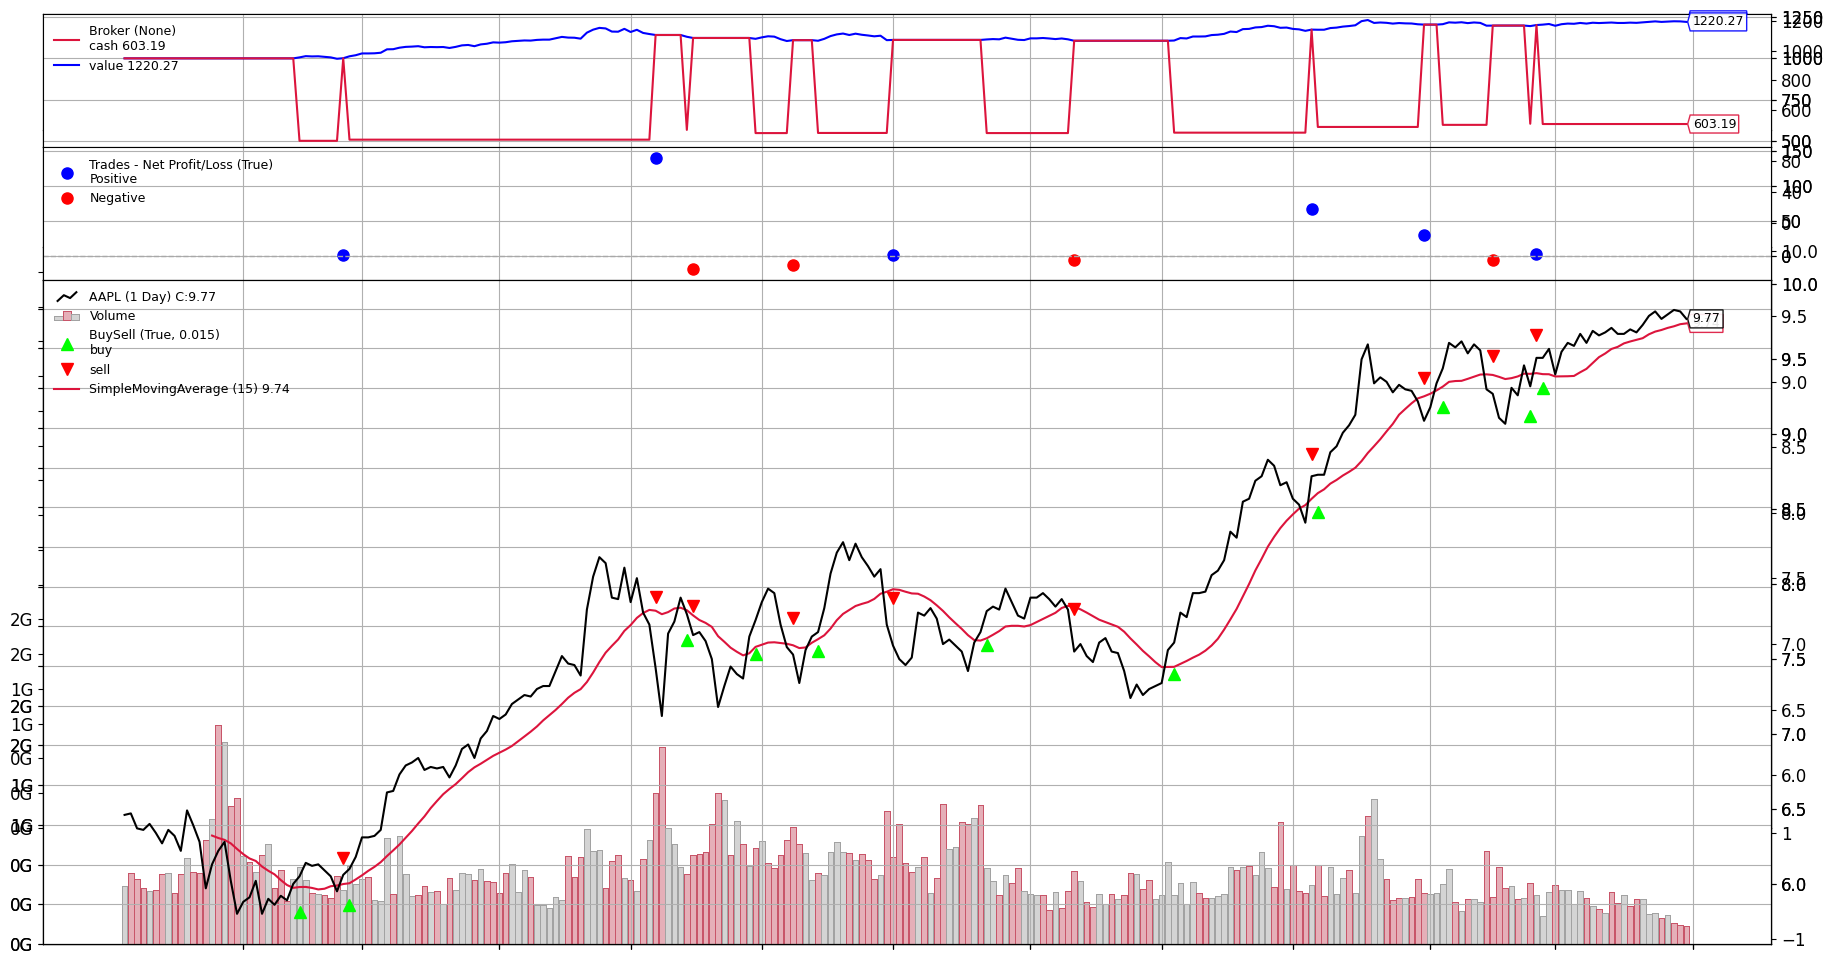

In [13]:
# Strategy 1: Buy when the price is above the 15-day moving average, sell when the price is below the 15-day moving average
class MyStrategy1(bt.Strategy):
    params = (
        ('maperiod', 15),
    )

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0].close, period=self.params.maperiod)

    def next(self):
        if not self.position:
            if self.dataclose[0] > self.sma[0]:
                self.buy()
        else:
            if self.dataclose[0] < self.sma[0]:
                self.sell()

run(MyStrategy1, from_date, to_date, initial_cash)

Final Portfolio Value: 1208.42


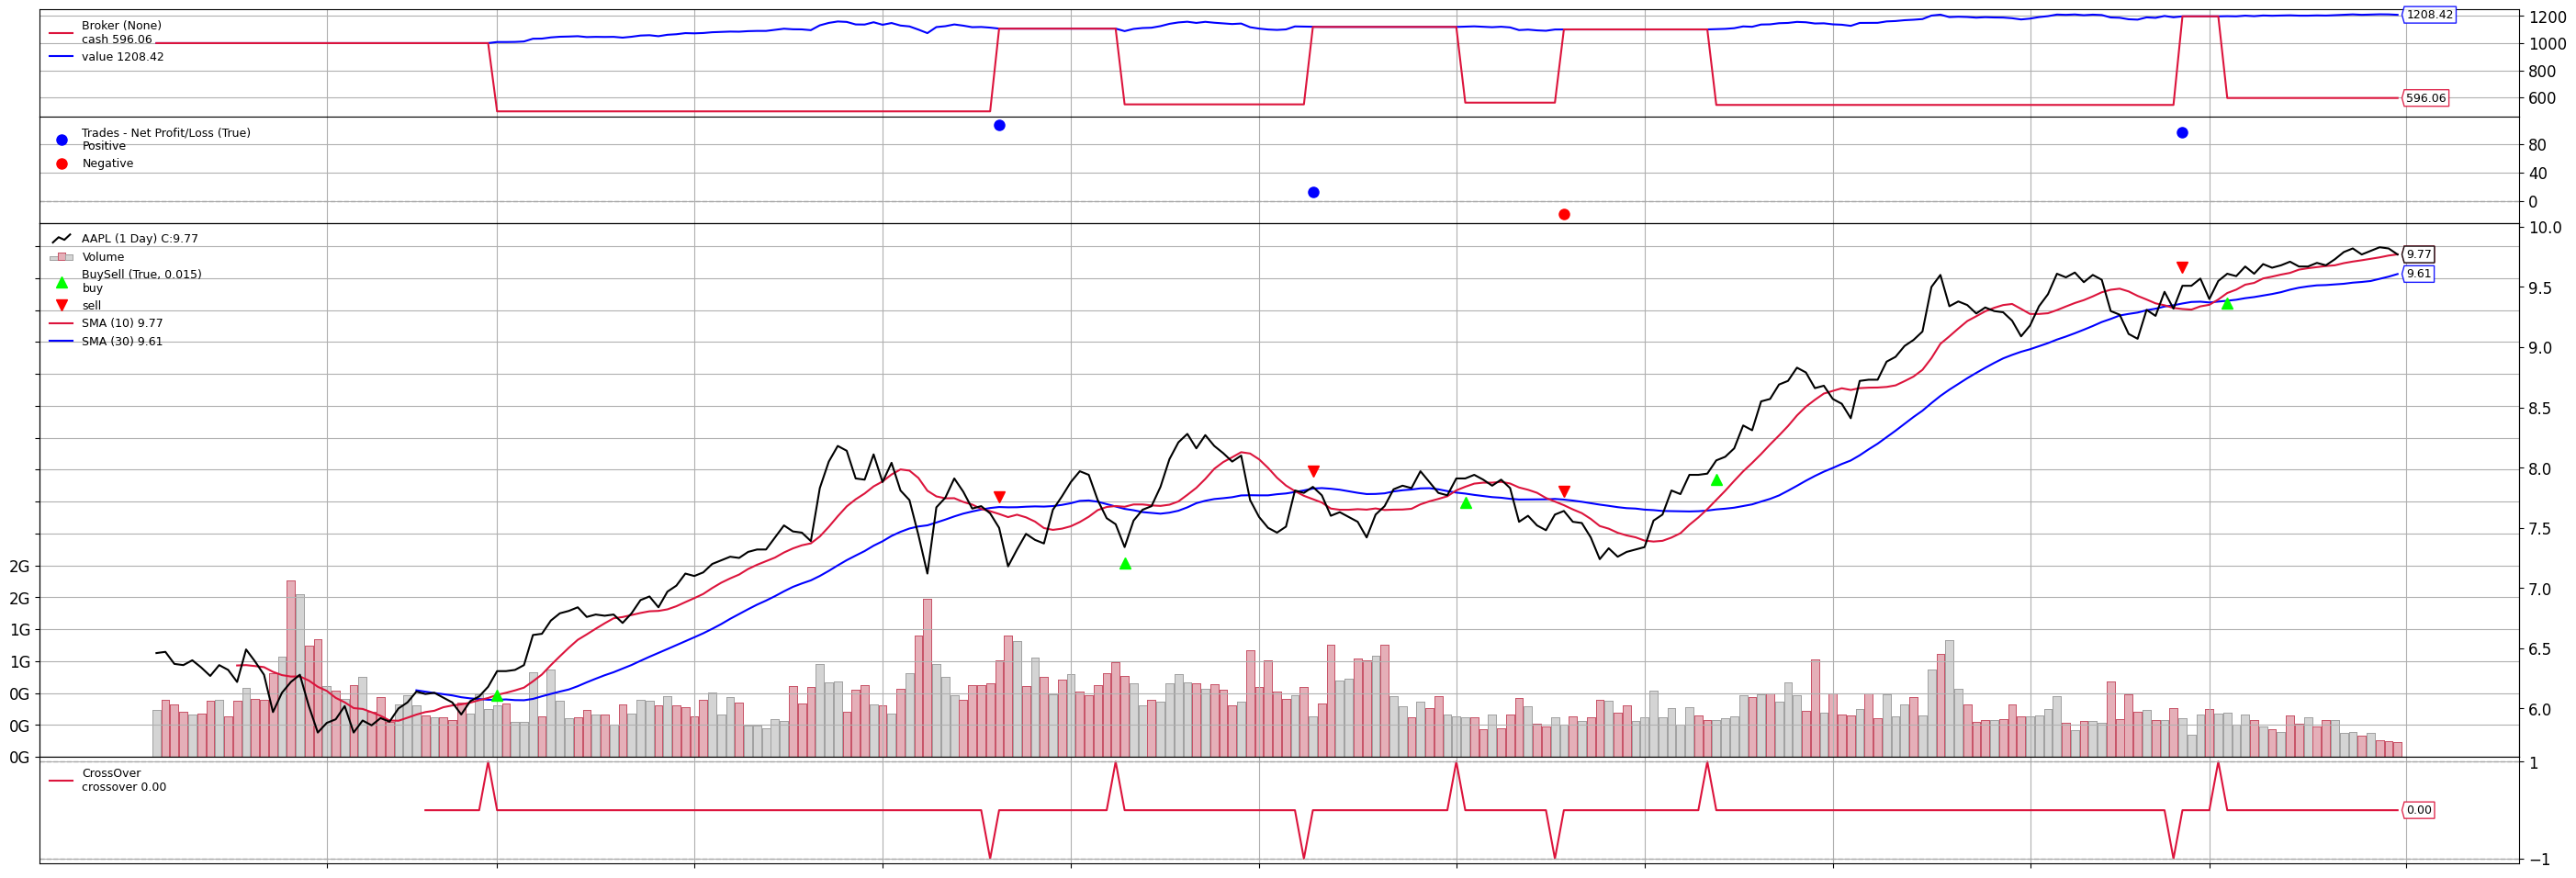

In [14]:
# Strategy 2: Buy when the 10-day moving average crosses above the 30-day moving average, sell when the 10-day moving average crosses below the 30-day moving average
class MyStrategy2(bt.SignalStrategy):
    # SmaCross
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=30)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)

run(MyStrategy2, from_date, to_date, initial_cash)